In [1]:
#Bliotecas Padrão
import numpy as np
import pandas as pd
from scipy.io import loadmat
import matplotlib.pyplot as plt

#Keras - CNN
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

#Bibliotecas Adicionais
import seaborn as sns #Grafico
from pathlib import Path #Diretorio
from tqdm import tqdm #Barra de Progressao

from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as r2
from sklearn.metrics import max_error as MAXE
from sklearn.preprocessing import MinMaxScaler




In [2]:
data = loadmat(f'Sim_Code-Data\dispersionpoints2048.mat')
print(data.keys())

data_lambda = data['lamda1']

#First and last run preview
print('\n===== Sample Simulação # 1 =====')
display(data_lambda[:,:,0])
display(data_lambda.shape)

print('\n===== Sample Simulação # 100 =====')
display(data_lambda[:,:,99])

#Espessura
print('\n===== Preview Espessura =====')
ESP = data['ESP'].reshape(-1,)
print(ESP.shape)
display(ESP)

#frequências normalizadas
x1 = data['x1']
print(f'Dimensao do Parametro X :{x1.shape}')
display(x1)

dict_keys(['__header__', '__version__', '__globals__', 'ESP', 'lamda1', 'x1'])

===== Sample Simulação # 1 =====


array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 6.68424850e-04, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.33633598e-03, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.21336062e+00, 1.02555310e+00, 1.02150318e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.21492907e+00, 1.02635696e+00, 1.02229426e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.21649627e+00, 1.02716038e+00, 1.02308477e+00]])

(2048, 66, 100)


===== Sample Simulação # 100 =====


array([[0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 5.06806211e-253, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 1.01322291e-252, 0.00000000e+000],
       ...,
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        7.77669752e-001, 7.00532590e-001, 6.77786707e-001],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        7.78763138e-001, 7.03245867e-001, 6.79364437e-001],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        7.79856987e-001, 7.05950036e-001, 6.80930830e-001]])


===== Preview Espessura =====
(100,)


array([0.03  , 0.0298, 0.0296, 0.0294, 0.0292, 0.029 , 0.0288, 0.0286,
       0.0284, 0.0282, 0.028 , 0.0278, 0.0276, 0.0274, 0.0272, 0.027 ,
       0.0268, 0.0266, 0.0264, 0.0262, 0.026 , 0.0258, 0.0256, 0.0254,
       0.0252, 0.025 , 0.0248, 0.0246, 0.0244, 0.0242, 0.024 , 0.0238,
       0.0236, 0.0234, 0.0232, 0.023 , 0.0228, 0.0226, 0.0224, 0.0222,
       0.022 , 0.0218, 0.0216, 0.0214, 0.0212, 0.021 , 0.0208, 0.0206,
       0.0204, 0.0202, 0.02  , 0.0198, 0.0196, 0.0194, 0.0192, 0.019 ,
       0.0188, 0.0186, 0.0184, 0.0182, 0.018 , 0.0178, 0.0176, 0.0174,
       0.0172, 0.017 , 0.0168, 0.0166, 0.0164, 0.0162, 0.016 , 0.0158,
       0.0156, 0.0154, 0.0152, 0.015 , 0.0148, 0.0146, 0.0144, 0.0142,
       0.014 , 0.0138, 0.0136, 0.0134, 0.0132, 0.013 , 0.0128, 0.0126,
       0.0124, 0.0122, 0.012 , 0.0118, 0.0116, 0.0114, 0.0112, 0.011 ,
       0.0108, 0.0106, 0.0104, 0.0102])

Dimensao do Parametro X :(2048, 100)


array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [3.000e-03, 3.000e-03, 3.000e-03, ..., 3.000e-03, 3.000e-03,
        3.000e-03],
       [6.000e-03, 6.000e-03, 6.000e-03, ..., 6.000e-03, 6.000e-03,
        6.000e-03],
       ...,
       [6.135e+00, 6.135e+00, 6.135e+00, ..., 6.135e+00, 6.135e+00,
        6.135e+00],
       [6.138e+00, 6.138e+00, 6.138e+00, ..., 6.138e+00, 6.138e+00,
        6.138e+00],
       [6.141e+00, 6.141e+00, 6.141e+00, ..., 6.141e+00, 6.141e+00,
        6.141e+00]])

In [3]:
data_lambda = (data_lambda - data_lambda.min())/(data_lambda.max() - data_lambda.min())
data_lambda.max()

1.0

In [4]:
#ESP_norm = (ESP - ESP.min())/(ESP.max() - ESP.min())

In [4]:
df_lambda_slice = pd.DataFrame(data_lambda[:,23:39,50], columns = range(23,39))
df_lambda_slice.describe()

,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,2048.0,2048.0,2.048000e+03,2.048000e+03,2.048000e+03,2.048000e+03,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000
mean,0.0,0.0,4.640069e-41,1.575278e-11,4.948860e-115,1.742216e-16,0.011988,0.027147,0.017870,0.014066,0.031079,0.028220,0.029791,0.050857,0.031766,0.018910
std,0.0,0.0,2.092261e-39,7.128893e-10,2.239598e-113,7.858033e-15,0.107884,0.154934,0.125104,0.109990,0.158588,0.147089,0.153267,0.202574,0.153738,0.116698
min,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.0,0.0,9.468449e-38,3.226169e-08,1.013527e-111,3.556126e-13,0.996041,0.984226,0.985171,0.955833,0.952991,0.993678,0.970983,0.994151,0.914625,0.958675


## CNN

#### Treino e Validação do Modelo CNN

In [5]:
x = np.transpose(data_lambda, (2, 0, 1))
print(x.shape)

x = x[:,:,34:]
print(x.shape)

x = x.reshape(-1,256,256)
print(x.shape)

X_train = x[:80,:,:]
y_train = ESP[0:80]

X_test = x[80:,:,:]
y_test = ESP[80:]

print("Shape do conjunto de treino X: ", X_train.shape)
print("Shape do conjunto de treino X: ", X_test.shape)

print("Shape do conjunto de treino Y: ", y_train.shape)
print("Shape do conjunto de treino Y: ", y_test.shape)

(100, 2048, 66)
(100, 2048, 32)
(100, 256, 256)
Shape do conjunto de treino X:  (80, 256, 256)
Shape do conjunto de treino X:  (20, 256, 256)
Shape do conjunto de treino Y:  (80,)
Shape do conjunto de treino Y:  (20,)


In [7]:
#Criação do modelo
#model = keras.Sequential()
Historico = []
#Adição da camada de convolução
kernel_size = 32 #entre 85 e 90 o maximo
max_pooling = 6 #entre 6 e 7 o maximo
RMSE_best = 9999

for conv_filter  in [5,15,30]:
    for kernel_size in [8,16,32]:
        for max_pooling in [2,4]:
            
            print(f'\n ##### conv_filter: {conv_filter} ######## kernel_size: {kernel_size}  ########## max_pooling: {max_pooling} ########')
            
            model = keras.Sequential()
            model.add(keras.layers.Conv2D(30, (kernel_size,kernel_size), activation='relu', input_shape=(X_train.shape[1],X_train.shape[2],1)))

            #Adição da camada de pooling
            model.add(keras.layers.MaxPooling2D((max_pooling,max_pooling)))

            #Adição de mais camadas de convolução e pooling (opcional)
            model.add(keras.layers.Conv2D(30, (kernel_size,kernel_size), activation='relu'))
            model.add(keras.layers.MaxPooling2D((max_pooling,max_pooling)))

            #Adição da camada fully connected para classificação
            model.add(keras.layers.Flatten())
            model.add(keras.layers.Dense(120, activation='relu'))
            model.add(keras.layers.Dense(84, activation='relu'))
            model.add(keras.layers.Dense(1))

            #model.summary()

            #Compilação do modelo
            model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

            #Adição do callback de early stopping
            early_stopping = EarlyStopping(monitor='val_loss', patience=8)

            #Treinamento do modelo
            history = model.fit(X_train, y_train, validation_split = 0.2, verbose = 1, epochs=64, callbacks=[early_stopping])
            
            y_hat = model.predict(X_test)
            
            RMSE = MSE(y_test,y_hat)**0.5
            Historico.append([[conv_filter, kernel_size, max_pooling], MSE(y_test,y_hat)**0.5, MSE(y_test,y_hat), MAXE(y_test,y_hat), r2(y_test,y_hat)])
            
            if RMSE < RMSE_best:
                best_model = model
                best_tunning = [conv_filter, kernel_size, max_pooling]
                RMSE_best = RMSE
                best_history = history

# Guardar el Modelo
best_model.save('best_model_2048_norm.h5')


 ##### conv_filter: 5 ######## kernel_size: 8  ########## max_pooling: 2 ########
Epoch 1/64
2/2 [==============================] - 4s 2s/step - loss: 3.5314 - mean_absolute_error: 1.3346 - val_loss: 0.6955 - val_mean_absolute_error: 0.8339
Epoch 2/64
2/2 [==============================] - 3s 2s/step - loss: 0.3319 - mean_absolute_error: 0.4719 - val_loss: 3.1499e-04 - val_mean_absolute_error: 0.0177
Epoch 3/64
2/2 [==============================] - 3s 2s/step - loss: 6.4764e-04 - mean_absolute_error: 0.0251 - val_loss: 1.8941e-04 - val_mean_absolute_error: 0.0137
Epoch 4/64
2/2 [==============================] - 3s 2s/step - loss: 4.7177e-04 - mean_absolute_error: 0.0214 - val_loss: 1.6178e-04 - val_mean_absolute_error: 0.0127
Epoch 5/64
2/2 [==============================] - 3s 2s/step - loss: 4.3583e-04 - mean_absolute_error: 0.0206 - val_loss: 1.4809e-04 - val_mean_absolute_error: 0.0121
Epoch 6/64
2/2 [==============================] - 3s 2s/step - loss: 4.1305e-04 - mean_absolut

Epoch 12/64
2/2 [==============================] - 10s 5s/step - loss: 1.5419e-05 - mean_absolute_error: 0.0034 - val_loss: 6.9957e-05 - val_mean_absolute_error: 0.0083
Epoch 13/64
2/2 [==============================] - 10s 5s/step - loss: 1.4769e-05 - mean_absolute_error: 0.0032 - val_loss: 9.8281e-05 - val_mean_absolute_error: 0.0099
Epoch 14/64
2/2 [==============================] - 11s 6s/step - loss: 1.8172e-05 - mean_absolute_error: 0.0036 - val_loss: 1.1743e-04 - val_mean_absolute_error: 0.0108
Epoch 15/64
2/2 [==============================] - 11s 5s/step - loss: 2.2386e-05 - mean_absolute_error: 0.0039 - val_loss: 1.2556e-04 - val_mean_absolute_error: 0.0112
Epoch 16/64
1/1 [==============================] - 0s 261ms/step

 ##### conv_filter: 5 ######## kernel_size: 16  ########## max_pooling: 4 ########
Epoch 1/64
2/2 [==============================] - 5s 2s/step - loss: 0.5569 - mean_absolute_error: 0.5335 - val_loss: 0.3285 - val_mean_absolute_error: 0.5730
Epoch 2/64
2/2 [

2/2 [==============================] - 11s 5s/step - loss: 35.9855 - mean_absolute_error: 4.2581 - val_loss: 0.0793 - val_mean_absolute_error: 0.2815
Epoch 2/64
2/2 [==============================] - 10s 5s/step - loss: 0.0398 - mean_absolute_error: 0.1558 - val_loss: 3.6997e-04 - val_mean_absolute_error: 0.0192
Epoch 3/64
2/2 [==============================] - 10s 5s/step - loss: 7.8361e-04 - mean_absolute_error: 0.0277 - val_loss: 4.3828e-04 - val_mean_absolute_error: 0.0209
Epoch 4/64
2/2 [==============================] - 10s 5s/step - loss: 8.5987e-04 - mean_absolute_error: 0.0291 - val_loss: 4.5813e-04 - val_mean_absolute_error: 0.0214
Epoch 5/64
2/2 [==============================] - 10s 5s/step - loss: 8.6666e-04 - mean_absolute_error: 0.0292 - val_loss: 4.1006e-04 - val_mean_absolute_error: 0.0202
Epoch 6/64
2/2 [==============================] - 10s 5s/step - loss: 7.7775e-04 - mean_absolute_error: 0.0276 - val_loss: 2.9125e-04 - val_mean_absolute_error: 0.0170
Epoch 7/64
2/2

2/2 [==============================] - 10s 5s/step - loss: 6.1368e-04 - mean_absolute_error: 0.0245 - val_loss: 2.4932e-04 - val_mean_absolute_error: 0.0158
Epoch 5/64
2/2 [==============================] - 10s 5s/step - loss: 5.6056e-04 - mean_absolute_error: 0.0234 - val_loss: 1.9743e-04 - val_mean_absolute_error: 0.0140
Epoch 6/64
2/2 [==============================] - 10s 5s/step - loss: 4.7420e-04 - mean_absolute_error: 0.0214 - val_loss: 1.3464e-04 - val_mean_absolute_error: 0.0116
Epoch 7/64
2/2 [==============================] - 10s 5s/step - loss: 3.6845e-04 - mean_absolute_error: 0.0188 - val_loss: 7.3053e-05 - val_mean_absolute_error: 0.0085
Epoch 8/64
2/2 [==============================] - 10s 5s/step - loss: 2.5705e-04 - mean_absolute_error: 0.0156 - val_loss: 2.2275e-05 - val_mean_absolute_error: 0.0046
Epoch 9/64
2/2 [==============================] - 10s 5s/step - loss: 1.5065e-04 - mean_absolute_error: 0.0116 - val_loss: 9.5376e-07 - val_mean_absolute_error: 8.3053e-04

In [8]:
df_Historico = pd.DataFrame(Historico, columns = ['Tunning','RMSE','MSE','MAXE','Pearson Corr'])
display(df_Historico)
print(best_tunning)
df_Historico.describe()

,Tunning,RMSE,MSE,MAXE,Pearson Corr
0,"[5, 8, 2]",0.015423,0.000238,0.017280,-177.847390
1,"[5, 8, 4]",0.016153,0.000261,0.018012,-195.189335
2,"[5, 16, 2]",0.014697,0.000216,0.016551,-161.406441
3,"[5, 16, 4]",0.006617,0.000044,0.010102,-31.917043
4,"[5, 32, 2]",0.015045,0.000226,0.016900,-169.180633
5,"[5, 32, 4]",0.012906,0.000167,0.014754,-124.237302
6,"[15, 8, 2]",0.017342,0.000301,0.019204,-225.135005
7,"[15, 8, 4]",0.011582,0.000134,0.016487,-99.860061
8,"[15, 16, 2]",0.011185,0.000125,0.013116,-93.059832
9,"[15, 16, 4]",0.010304,0.000106,0.012862,-78.834200


[30, 16, 4]


,RMSE,MSE,MAXE,Pearson Corr
count,18.000000,18.000000,18.000000,18.000000
mean,0.012681,0.000173,0.014975,-129.273350
std,0.003631,0.000076,0.002966,57.410309
min,0.002401,0.000006,0.007419,-225.135005
25%,0.011348,0.000129,0.013155,-168.796469
50%,0.013217,0.000175,0.015933,-130.413107
75%,0.015028,0.000226,0.016883,-95.846613
max,0.017342,0.000301,0.019204,-3.334134


Text(0.5, 1.0, 'Train and Test MSE Over Epochs')

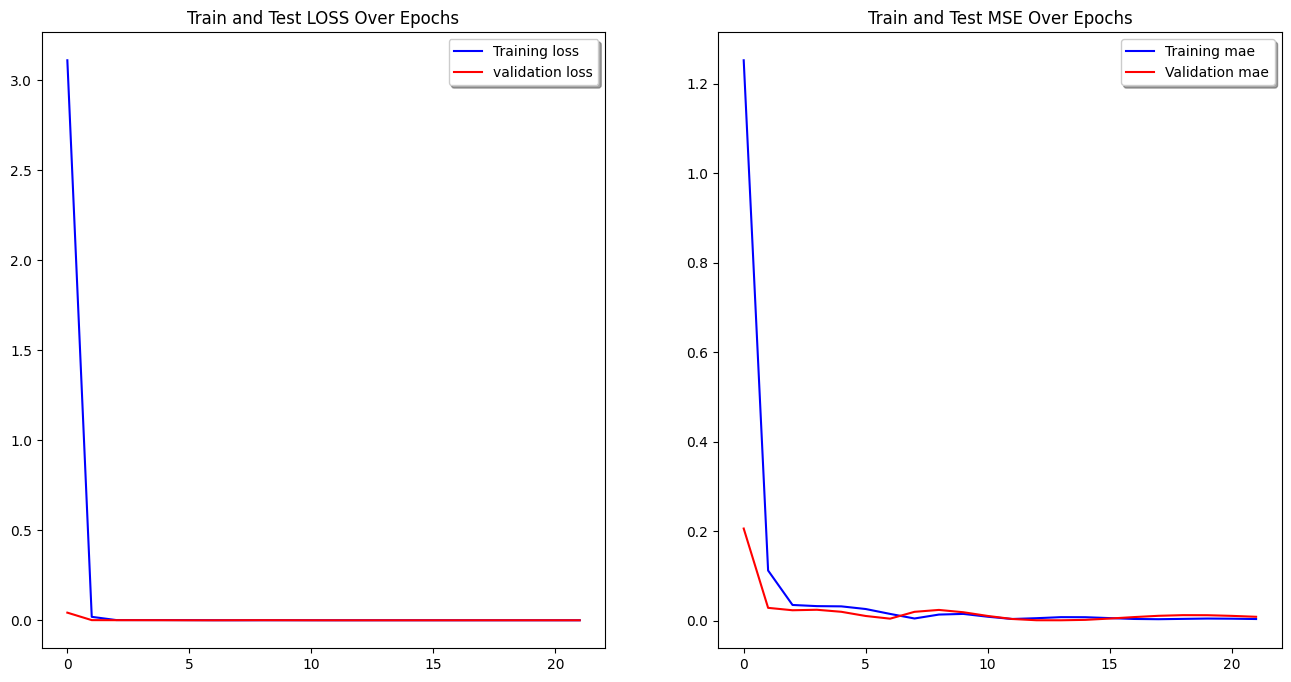

In [9]:
# Guardar el Modelo
#model.save('CNN_model_2048.h5')

#Load
model = keras.load_model('best_model_2048_norm.h5')

fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)
ax[0].set_title('Train and Test LOSS Over Epochs')

ax[1].plot(history.history['mean_absolute_error'], color='b', label="Training mae")
ax[1].plot(history.history['val_mean_absolute_error'], color='r',label="Validation mae")
legend = ax[1].legend(loc='best', shadow=True)
ax[1].set_title('Train and Test MSE Over Epochs')

In [8]:
#Load
best_model = keras.models.load_model('best_model_2048_norm.h5')

3/3 [==============================] - 0s 91ms/step


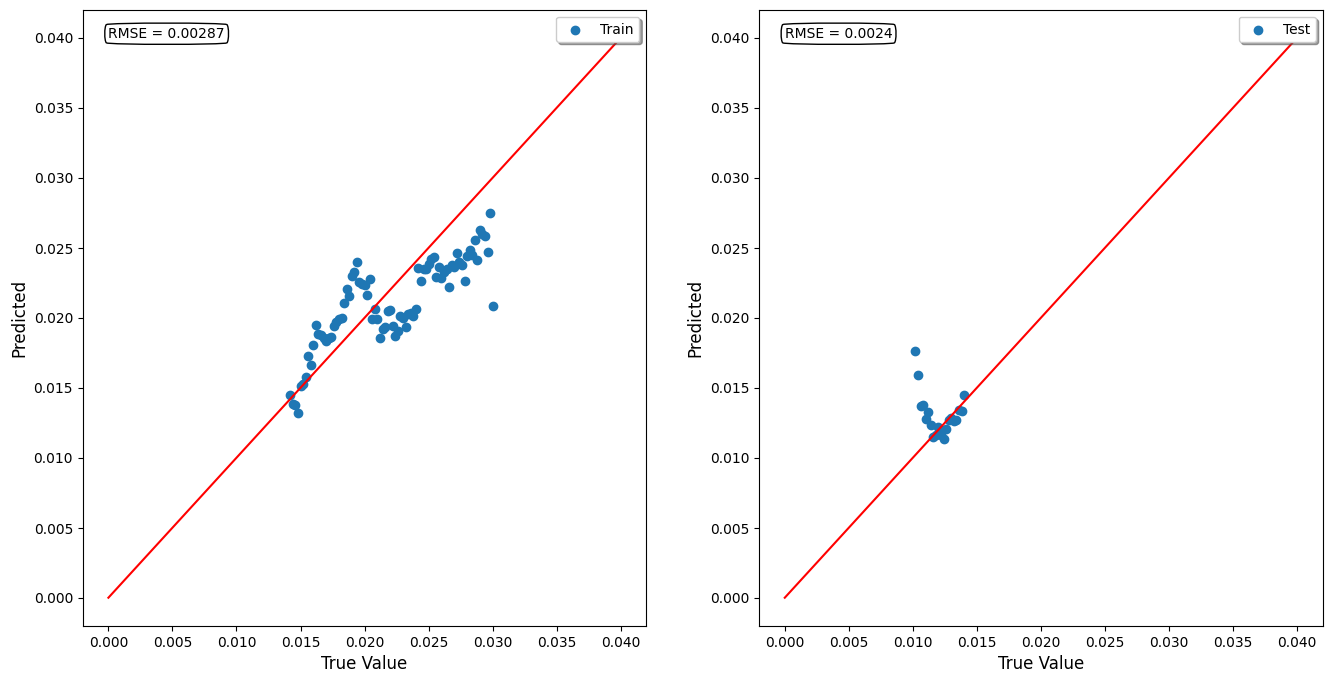

In [16]:
y_pred_test = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)

#y_pred = scaler_target.inverse_transform(y_pred)

fig, ax = plt.subplots(1,2, figsize=(16,8))

line1 = [0,0.04]

ax[0].scatter(y_train[:80], y_pred_train, label='Train')
ax[0].plot(line1,line1, color = 'r')
legend = ax[0].legend(loc='upper right', shadow=True)
RMSE_train = MSE(y_train,y_pred_train)**0.5
ax[0].annotate("RMSE = " + str(round(RMSE_train,5)), (0,0.04), bbox=dict(boxstyle="round4", fc="w"))
#ax[0].set_title('Train Prediction')
ax[0].set_xlabel('True Value', fontsize = 12)
ax[0].set_ylabel('Predicted', fontsize = 12)


ax[1].scatter(y_test, y_pred_test, label='Test')
ax[1].plot(line1,line1, color = 'r')
legend = ax[1].legend(loc='upper right', shadow=True)
RMSE_test = MSE(y_test,y_pred_test)**0.5
ax[1].annotate("RMSE = " + str(round(RMSE_test,5)), (0,0.04), bbox=dict(boxstyle="round4", fc="w"))
#ax[1].set_title('Test Prediction')
ax[1].set_xlabel('True Value', fontsize = 12)
ax[1].set_ylabel('Predicted', fontsize = 12)

plt.show()

In [11]:
best_model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 241, 241, 30)      7710      
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 60, 60, 30)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 45, 45, 30)        230430    
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 11, 11, 30)       0         
 g2D)                                                            
                                                                 
 flatten_15 (Flatten)        (None, 3630)              0         
                                                                 
 dense_45 (Dense)            (None, 120)             